### 6.2 Building an animated Histogram

<IPython.core.display.Javascript object>


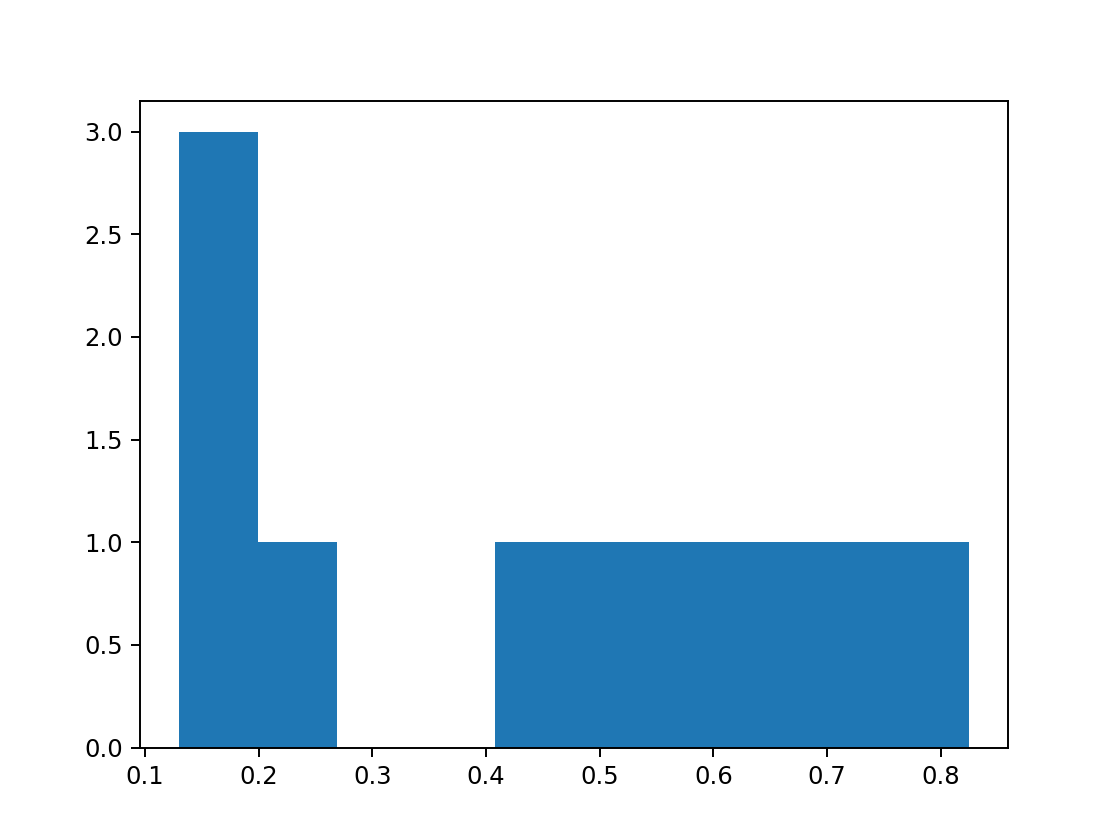

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook

n= 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])


animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ))
plt.show()

### 6.3 Creating animated subpolots

<IPython.core.display.Javascript object>


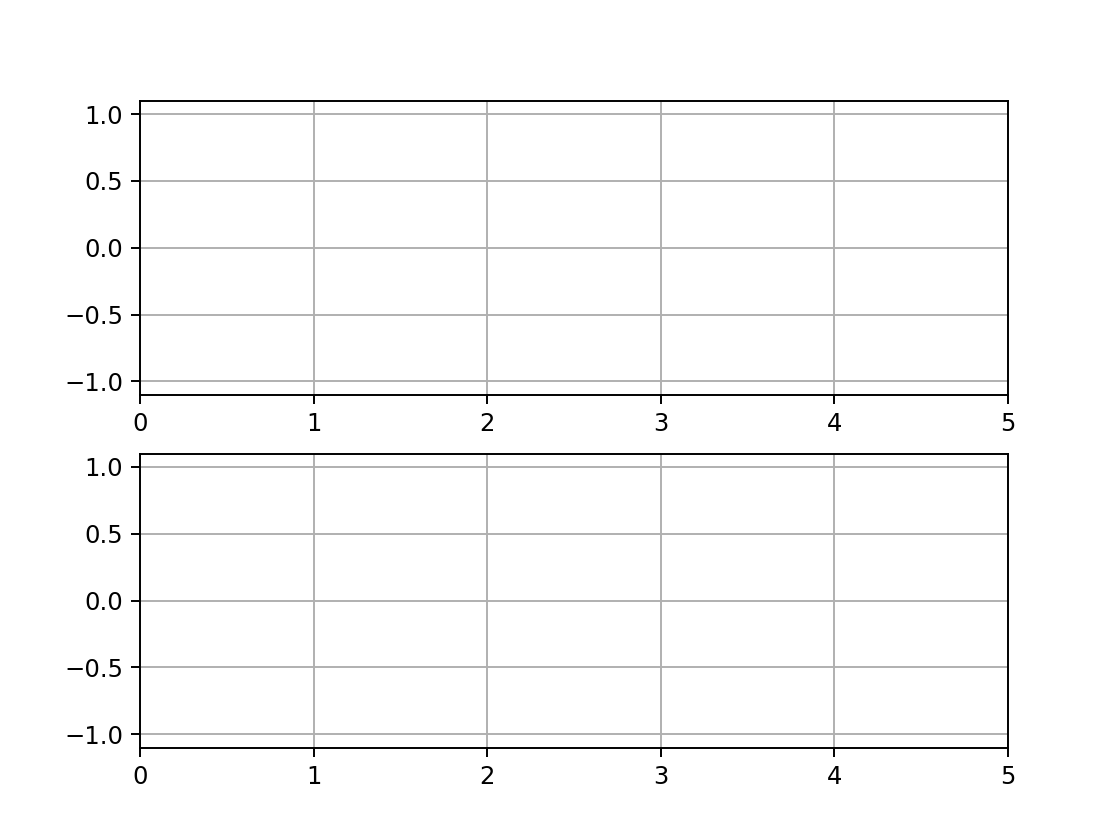

In [16]:
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y1 = np.sin(2*np.pi*t) * np.exp(-t/10.)
        y2 = np.cos(2*np.pi*t) * np.exp(-t/10.)
        yield t, y1, y2
        
data_gen.t = 0

#two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize two line objects (one in each axes)
line1 = ax1.plot([], [], lw=2)
line2 = ax2.plot([], [], lw=2, color='r')
line = [line1, line2]

# the same axes intalizations as before
for ax in [ax1, ax2]:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    ax.grid()

# initalize the data
xdata, y1data, y2data = [], [], []
def run(data):
    # Update the data
    t, y1, y2 = data
    xdata.append(t)
    y1data.append(y1)
    y2data.append(y2)
    
    # axis limits checking
    for ax in [ax1, ax2]:
        xmin, xmax = ax.get_xlim()
        if t >= xmax:
            ax.set_xlim(xmin, 2*xmax)
            ax.figure.canvas.draw()
        
    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)
        
    return line

ani = FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()